In [0]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

TensorFlow 2.x selected.


'2.1.0-rc1'

Importing the Data:

In [0]:
!wget https://aisight.de/drive/dataset/2019-05-03/DataSet.zip

--2020-01-20 11:40:55--  https://aisight.de/drive/dataset/2019-05-03/DataSet.zip
Resolving aisight.de (aisight.de)... 3.120.123.193
Connecting to aisight.de (aisight.de)|3.120.123.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90823415 (87M) [application/zip]
Saving to: ‘DataSet.zip’

DataSet.zip         100%[===================>]  86.62M  8.89MB/s    in 12s     

2020-01-20 11:41:08 (7.24 MB/s) - ‘DataSet.zip’ saved [90823415/90823415]



In [0]:
import zipfile
path = '/tmp/data'
with zipfile.ZipFile("DataSet.zip", "r") as data_ref:
  data_ref.extractall(path)

In [0]:
import os
os.chdir(path)

In [0]:
with zipfile.ZipFile("project_fan.csv.zip", "r") as data_fan:
  data_fan.extractall()

Importing Libraries:

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


# Preprocessing 
Reading the Data and Labelling Columns: 

In [0]:
columns = ['Unix_time','Sample_Size' ,'Time_Period' ,'Sampling_Rate' , 'Sensor_Data']
data = pd.read_csv("project_fan.csv", delimiter=';',header=None, error_bad_lines=False, names=columns) 
data

,Unix_time,Sample_Size,Time_Period,Sampling_Rate,Sensor_Data
0,1.556891e+09,16384,340,48188.235294,"[1618.6294555664062, 1619.0826416015625, 1620...."
1,1.556891e+09,16384,341,48046.920821,"[1619.78759765625, 1619.0826416015625, 1620.49..."
2,1.556891e+09,16384,340,48188.235294,"[1619.6365356445312, 1620.6436157226562, 1620...."
3,1.556891e+09,16384,340,48188.235294,"[1619.8883056640625, 1619.7372436523435, 1619...."
4,1.556891e+09,16384,340,48188.235294,"[1619.6365356445312, 1620.2911376953125, 1620...."
...,...,...,...,...,...
895,1.556891e+09,16384,341,48046.920821,"[1577.8930664062498, 1576.4328002929685, 1575...."
896,1.556891e+09,16384,340,48188.235294,"[1610.5224609375, 1618.6798095703123, 1624.722..."
897,1.556891e+09,16384,341,48046.920821,"[1617.572021484375, 1621.8017578125, 1625.3265..."
898,1.556891e+09,16384,340,48188.235294,"[1643.756103515625, 1643.3532714843748, 1644.0..."


In [0]:
data.head(10)

,Unix_time,Sample_Size,Time_Period,Sampling_Rate,Sensor_Data
0,1.556891e+09,16384,340,48188.235294,"[1618.6294555664062, 1619.0826416015625, 1620...."
1,1.556891e+09,16384,341,48046.920821,"[1619.78759765625, 1619.0826416015625, 1620.49..."
2,1.556891e+09,16384,340,48188.235294,"[1619.6365356445312, 1620.6436157226562, 1620...."
3,1.556891e+09,16384,340,48188.235294,"[1619.8883056640625, 1619.7372436523435, 1619...."
4,1.556891e+09,16384,340,48188.235294,"[1619.6365356445312, 1620.2911376953125, 1620...."
5,1.556891e+09,16384,341,48046.920821,"[1620.1904296874998, 1619.9890136718748, 1619...."
6,1.556891e+09,16384,340,48188.235294,"[1619.8883056640625, 1620.7443237304685, 1620...."
7,1.556891e+09,16384,340,48188.235294,"[1619.8883056640625, 1619.3344116210938, 1619...."
8,1.556891e+09,16384,340,48188.235294,"[1620.0393676757812, 1620.3414916992188, 1619...."
9,1.556891e+09,16384,341,48046.920821,"[1619.78759765625, 1619.7372436523435, 1620.03..."


In [0]:
col_to_list = data.Sensor_Data.tolist()

In [0]:
data.head(10)

,Unix_time,Sample_Size,Time_Period,Sampling_Rate,Sensor_Data
0,1.556891e+09,16384,340,48188.235294,"[1618.6294555664062, 1619.0826416015625, 1620...."
1,1.556891e+09,16384,341,48046.920821,"[1619.78759765625, 1619.0826416015625, 1620.49..."
2,1.556891e+09,16384,340,48188.235294,"[1619.6365356445312, 1620.6436157226562, 1620...."
3,1.556891e+09,16384,340,48188.235294,"[1619.8883056640625, 1619.7372436523435, 1619...."
4,1.556891e+09,16384,340,48188.235294,"[1619.6365356445312, 1620.2911376953125, 1620...."
5,1.556891e+09,16384,341,48046.920821,"[1620.1904296874998, 1619.9890136718748, 1619...."
6,1.556891e+09,16384,340,48188.235294,"[1619.8883056640625, 1620.7443237304685, 1620...."
7,1.556891e+09,16384,340,48188.235294,"[1619.8883056640625, 1619.3344116210938, 1619...."
8,1.556891e+09,16384,340,48188.235294,"[1620.0393676757812, 1620.3414916992188, 1619...."
9,1.556891e+09,16384,341,48046.920821,"[1619.78759765625, 1619.7372436523435, 1620.03..."


In [0]:
type(col_to_list[0])

str

In [0]:
for i in range(len(data['Sensor_Data'])):
  data.Sensor_Data[i] = data.Sensor_Data[i].replace('[','').replace(']','')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
type(data['Sensor_Data'][0])

str

In [0]:
data['Sensor_Data'][0]

'1618.6294555664062, 1619.0826416015625, 1620.0897216796875, 1620.0393676757812, 1620.0393676757812, 1620.240783691406, 1620.391845703125, 1620.0897216796875, 1619.435119628906, 1620.4925537109373, 1620.7443237304685, 1621.0464477539062, 1620.5429077148438, 1621.0968017578125, 1620.7443237304685, 1619.9386596679685, 1620.0393676757812, 1619.7372436523435, 1619.5358276367188, 1618.9315795898435, 1619.6365356445312, 1619.8379516601562, 1620.7443237304685, 1620.4925537109373, 1620.442199707031, 1620.59326171875, 1620.442199707031, 1619.9890136718748, 1620.391845703125, 1620.6436157226562, 1620.0393676757812, 1619.5358276367188, 1620.442199707031, 1620.59326171875, 1620.6939697265623, 1619.4854736328123, 1620.6939697265623, 1621.0968017578125, 1620.442199707031, 1620.59326171875, 1620.6436157226562, 1620.442199707031, 1620.0393676757812, 1620.0897216796875, 1619.6868896484373, 1620.1400756835938, 1619.8379516601562, 1619.7372436523435, 1619.2840576171875, 1619.7372436523435, 1620.291137695

Parsing Sensor Data into Separate Columns of Datatype Float:

In [0]:
rng = range(0, 16539)
col_list = {key : 'Sensor_Data_{}'.format(key) for key in rng} 
col_list

{0: 'Sensor_Data_0',
 1: 'Sensor_Data_1',
 2: 'Sensor_Data_2',
 3: 'Sensor_Data_3',
 4: 'Sensor_Data_4',
 5: 'Sensor_Data_5',
 6: 'Sensor_Data_6',
 7: 'Sensor_Data_7',
 8: 'Sensor_Data_8',
 9: 'Sensor_Data_9',
 10: 'Sensor_Data_10',
 11: 'Sensor_Data_11',
 12: 'Sensor_Data_12',
 13: 'Sensor_Data_13',
 14: 'Sensor_Data_14',
 15: 'Sensor_Data_15',
 16: 'Sensor_Data_16',
 17: 'Sensor_Data_17',
 18: 'Sensor_Data_18',
 19: 'Sensor_Data_19',
 20: 'Sensor_Data_20',
 21: 'Sensor_Data_21',
 22: 'Sensor_Data_22',
 23: 'Sensor_Data_23',
 24: 'Sensor_Data_24',
 25: 'Sensor_Data_25',
 26: 'Sensor_Data_26',
 27: 'Sensor_Data_27',
 28: 'Sensor_Data_28',
 29: 'Sensor_Data_29',
 30: 'Sensor_Data_30',
 31: 'Sensor_Data_31',
 32: 'Sensor_Data_32',
 33: 'Sensor_Data_33',
 34: 'Sensor_Data_34',
 35: 'Sensor_Data_35',
 36: 'Sensor_Data_36',
 37: 'Sensor_Data_37',
 38: 'Sensor_Data_38',
 39: 'Sensor_Data_39',
 40: 'Sensor_Data_40',
 41: 'Sensor_Data_41',
 42: 'Sensor_Data_42',
 43: 'Sensor_Data_43',
 44: 'Se

In [0]:
data = data.join(data['Sensor_Data'].str.split(',', expand=True).rename(columns=col_list).astype(float))

In [0]:
data.describe()

,Unix_time,Sample_Size,Time_Period,Sampling_Rate,Sensor_Data_0,Sensor_Data_1,Sensor_Data_2,Sensor_Data_3,Sensor_Data_4,Sensor_Data_5,Sensor_Data_6,Sensor_Data_7,Sensor_Data_8,Sensor_Data_9,Sensor_Data_10,Sensor_Data_11,Sensor_Data_12,Sensor_Data_13,Sensor_Data_14,Sensor_Data_15,Sensor_Data_16,Sensor_Data_17,Sensor_Data_18,Sensor_Data_19,Sensor_Data_20,Sensor_Data_21,Sensor_Data_22,Sensor_Data_23,Sensor_Data_24,Sensor_Data_25,Sensor_Data_26,Sensor_Data_27,Sensor_Data_28,Sensor_Data_29,Sensor_Data_30,Sensor_Data_31,Sensor_Data_32,Sensor_Data_33,Sensor_Data_34,Sensor_Data_35,...,Sensor_Data_16499,Sensor_Data_16500,Sensor_Data_16501,Sensor_Data_16502,Sensor_Data_16503,Sensor_Data_16504,Sensor_Data_16505,Sensor_Data_16506,Sensor_Data_16507,Sensor_Data_16508,Sensor_Data_16509,Sensor_Data_16510,Sensor_Data_16511,Sensor_Data_16512,Sensor_Data_16513,Sensor_Data_16514,Sensor_Data_16515,Sensor_Data_16516,Sensor_Data_16517,Sensor_Data_16518,Sensor_Data_16519,Sensor_Data_16520,Sensor_Data_16521,Sensor_Data_16522,Sensor_Data_16523,Sensor_Data_16524,Sensor_Data_16525,Sensor_Data_16526,Sensor_Data_16527,Sensor_Data_16528,Sensor_Data_16529,Sensor_Data_16530,Sensor_Data_16531,Sensor_Data_16532,Sensor_Data_16533,Sensor_Data_16534,Sensor_Data_16535,Sensor_Data_16536,Sensor_Data_16537,Sensor_Data_16538
count,9.000000e+02,900.0,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,1.556891e+09,16384.0,340.407778,48130.610392,1619.999588,1620.351562,1620.350388,1620.414953,1620.398951,1620.348765,1620.316762,1620.290858,1620.258799,1620.211075,1620.160609,1620.124410,1620.100352,1620.094701,1620.053802,1620.102422,1620.088994,1620.094589,1620.123906,1620.141754,1620.173813,1620.197703,1620.207662,1620.294607,1620.320623,1620.384349,1620.434926,1620.466537,1620.528529,1620.603556,1620.665995,1620.709300,1620.808721,1620.932592,1620.543299,1620.543355,...,1619.258881,1613.140869,1607.601929,1602.465820,1597.480774,1594.761658,1592.722321,1590.204620,1589.550018,1589.902496,1591.312408,1593.527985,1596.498871,1600.376129,1604.454803,1608.659363,1614.777374,1619.611359,1624.873352,1628.675079,1633.609772,1637.814331,1641.590881,1644.813538,1647.331238,1648.590088,1648.741150,1649.345398,1648.489380,1646.827698,1643.781281,1640.533447,1637.386322,1633.634949,1642.195129,1639.526367,1636.505127,1632.577515,1630.412292,1627.592468
std,1.422700e+02,0.0,0.491695,69.483579,16.188872,16.125618,16.117991,16.019445,16.007460,15.888835,15.822899,15.712324,15.720249,15.651143,15.684637,15.683498,15.707754,15.772796,15.816819,15.879366,15.930236,16.002155,16.035616,16.036791,15.968675,15.927727,15.925986,15.868853,15.800841,15.713118,15.689245,15.588271,15.533760,15.540161,15.505444,15.464683,15.521350,15.489305,15.596180,15.679317,...,15.986940,17.945251,18.799787,17.874040,19.155844,19.227055,18.336914,16.485419,15.132404,13.138488,10.076401,7.512794,4.735552,1.602255,2.243156,4.984792,9.435499,10.788514,13.458939,15.630884,16.627842,16.307391,16.449814,16.307391,13.743784,12.533191,10.040795,7.049920,3.702988,0.071211,3.026481,6.266596,10.646092,13.245305,NaN,NaN,NaN,NaN,NaN,NaN
min,1.556891e+09,16384.0,340.000000,48046.920821,1573.713684,1573.310852,1573.663330,1572.958374,1573.260498,1574.116516,1576.281738,1576.181030,1574.972534,1573.91510

In [0]:
data

,Unix_time,Sample_Size,Time_Period,Sampling_Rate,Sensor_Data,Sensor_Data_0,Sensor_Data_1,Sensor_Data_2,Sensor_Data_3,Sensor_Data_4,Sensor_Data_5,Sensor_Data_6,Sensor_Data_7,Sensor_Data_8,Sensor_Data_9,Sensor_Data_10,Sensor_Data_11,Sensor_Data_12,Sensor_Data_13,Sensor_Data_14,Sensor_Data_15,Sensor_Data_16,Sensor_Data_17,Sensor_Data_18,Sensor_Data_19,Sensor_Data_20,Sensor_Data_21,Sensor_Data_22,Sensor_Data_23,Sensor_Data_24,Sensor_Data_25,Sensor_Data_26,Sensor_Data_27,Sensor_Data_28,Sensor_Data_29,Sensor_Data_30,Sensor_Data_31,Sensor_Data_32,Sensor_Data_33,Sensor_Data_34,...,Sensor_Data_16499,Sensor_Data_16500,Sensor_Data_16501,Sensor_Data_16502,Sensor_Data_16503,Sensor_Data_16504,Sensor_Data_16505,Sensor_Data_16506,Sensor_Data_16507,Sensor_Data_16508,Sensor_Data_16509,Sensor_Data_16510,Sensor_Data_16511,Sensor_Data_16512,Sensor_Data_16513,Sensor_Data_16514,Sensor_Data_16515,Sensor_Data_16516,Sensor_Data_16517,Sensor_Data_16518,Sensor_Data_16519,Sensor_Data_16520,Sensor_Data_16521,Sensor_Data_16522,Sensor_Data_16523,Sensor_Data_16524,Sensor_Data_16525,Sensor_Data_16526,Sensor_Data_16527,Sensor_Data_16528,Sensor_Data_16529,Sensor_Data_16530,Sensor_Data_16531,Sensor_Data_16532,Sensor_Data_16533,Sensor_Data_16534,Sensor_Data_16535,Sensor_Data_16536,Sensor_Data_16537,Sensor_Data_16538
0,1.556891e+09,16384,340,48188.235294,"1618.6294555664062, 1619.0826416015625, 1620.0...",1618.629456,1619.082642,1620.089722,1620.039368,1620.039368,1620.240784,1620.391846,1620.089722,1619.435120,1620.492554,1620.744324,1621.046448,1620.542908,1621.096802,1620.744324,1619.938660,1620.039368,1619.737244,1619.535828,1618.931580,1619.636536,1619.837952,1620.744324,1620.492554,1620.442200,1620.593262,1620.442200,1619.989014,1620.391846,1620.643616,1620.039368,1619.535828,1620.442200,1620.593262,1620.693970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.556891e+09,16384,341,48046.920821,"1619.78759765625, 1619.0826416015625, 1620.492...",1619.787598,1619.082642,1620.492554,1620.190430,1620.039368,1619.636536,1620.895386,1619.284058,1619.787598,1620.089722,1620.291138,1620.693970,1620.140076,1620.240784,1619.888306,1618.428040,1620.492554,1619.989014,1620.442200,1618.428040,1620.845032,1620.442200,1619.485474,1619.787598,1619.636536,1620.089722,1620.089722,1620.089722,1620.442200,1620.492554,1620.291138,1619.989014,1620.140076,1619.636536,1619.888306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.556891e+09,16384,340,48188.235294,"1619.6365356445312, 1620.6436157226562, 1620.2...",1619.636536,1620.643616,1620.291138,1620.693970,1620.140076,1620.190430,1620.895386,1620.442200,1619.837952,1620.643616,1620.240784,1621.046448,1621.247864,1620.794678,1620.945740,1620.190430,1620.693970,1620.391846,1620.542908,1620.291138,1619.989014,1619.334412,1619.787598,1619.284058,1620.089722,1619.787598,1619.384766,1619.233704,1620.240784,1620.089722,1619.586182,1620.391846,1619.938660,1620.039368,1621.298218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.556891e+09,16384,340,48188.235294,"1619.8883056640625, 1619.7372436523435, 1619.6...",1619.888306,1619.737244,1619.686890,1620.240784,1619.837952,1620.341492,1619.233704,1620.492554,1620.240784,1620.240784,1620.391846,1620.291138,1620.391846,1619.737244,1619.737244,1619.787598,1620.593262,1619.938660,1619.636536,1619.334412,1620.794678,1620.039368,1620.039368,1619.636536,1620.039368,1619.636536,1619.686890,1620.391846,1620.089722,1619.686890,1619.938660,1620.492554,1621.398926,1620.895386,1619.686890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.

Extracting important Features and Removing Redundant Features:

In [0]:
data.drop('Sensor_Data', axis=1, inplace=True)

In [0]:
train = data.drop(['Unix_time', 'Sample_Size','Time_Period',	'Sampling_Rate'], axis = 1)

In [0]:
train.mean(axis=1)

0      1620.242170
1      1620.237716
2      1620.236340
3      1620.229289
4      1620.227541
          ...     
895    1620.553514
896    1620.607006
897    1620.611806
898    1620.598791
899    1620.549076
Length: 900, dtype: float64

In [0]:
train.fillna(inplace=True, axis=1, method='pad')

Filling Missing Values with Mean Row values :

In [0]:
train

,Sensor_Data_0,Sensor_Data_1,Sensor_Data_2,Sensor_Data_3,Sensor_Data_4,Sensor_Data_5,Sensor_Data_6,Sensor_Data_7,Sensor_Data_8,Sensor_Data_9,Sensor_Data_10,Sensor_Data_11,Sensor_Data_12,Sensor_Data_13,Sensor_Data_14,Sensor_Data_15,Sensor_Data_16,Sensor_Data_17,Sensor_Data_18,Sensor_Data_19,Sensor_Data_20,Sensor_Data_21,Sensor_Data_22,Sensor_Data_23,Sensor_Data_24,Sensor_Data_25,Sensor_Data_26,Sensor_Data_27,Sensor_Data_28,Sensor_Data_29,Sensor_Data_30,Sensor_Data_31,Sensor_Data_32,Sensor_Data_33,Sensor_Data_34,Sensor_Data_35,Sensor_Data_36,Sensor_Data_37,Sensor_Data_38,Sensor_Data_39,...,Sensor_Data_16499,Sensor_Data_16500,Sensor_Data_16501,Sensor_Data_16502,Sensor_Data_16503,Sensor_Data_16504,Sensor_Data_16505,Sensor_Data_16506,Sensor_Data_16507,Sensor_Data_16508,Sensor_Data_16509,Sensor_Data_16510,Sensor_Data_16511,Sensor_Data_16512,Sensor_Data_16513,Sensor_Data_16514,Sensor_Data_16515,Sensor_Data_16516,Sensor_Data_16517,Sensor_Data_16518,Sensor_Data_16519,Sensor_Data_16520,Sensor_Data_16521,Sensor_Data_16522,Sensor_Data_16523,Sensor_Data_16524,Sensor_Data_16525,Sensor_Data_16526,Sensor_Data_16527,Sensor_Data_16528,Sensor_Data_16529,Sensor_Data_16530,Sensor_Data_16531,Sensor_Data_16532,Sensor_Data_16533,Sensor_Data_16534,Sensor_Data_16535,Sensor_Data_16536,Sensor_Data_16537,Sensor_Data_16538
0,1618.629456,1619.082642,1620.089722,1620.039368,1620.039368,1620.240784,1620.391846,1620.089722,1619.435120,1620.492554,1620.744324,1621.046448,1620.542908,1621.096802,1620.744324,1619.938660,1620.039368,1619.737244,1619.535828,1618.931580,1619.636536,1619.837952,1620.744324,1620.492554,1620.442200,1620.593262,1620.442200,1619.989014,1620.391846,1620.643616,1620.039368,1619.535828,1620.442200,1620.593262,1620.693970,1619.485474,1620.693970,1621.096802,1620.442200,1620.593262,...,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430,1620.190430
1,1619.787598,1619.082642,1620.492554,1620.190430,1620.039368,1619.636536,1620.895386,1619.284058,1619.787598,1620.089722,1620.291138,1620.693970,1620.140076,1620.240784,1619.888306,1618.428040,1620.492554,1619.989014,1620.442200,1618.428040,1620.845032,1620.442200,1619.485474,1619.787598,1619.636536,1620.089722,1620.089722,1620.089722,1620.442200,1620.492554,1620.291138,1619.989014,1620.140076,1619.636536,1619.888306,1620.190430,1619.586182,1619.837952,1620.240784,1619.636536,...,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890,1619.686890
2,1619.636536,1620.643616,1620.291138,1620.693970,1620.140076,1620.190430,1620.895386,1620.442200,1619.837952,1620.643616,1620.240784,1621.046448,1621.247864,1620.794678,1620.945740,1620.190430,1620.693970,1620.391846,1620.542908,1620.291138,1619.989014,1619.334412,1619.787598,1619.284058,1620.089722,1619.787598,1619.384766,1619.233704,1620.240784,1620.089722,1619.586182,1620.391846,1619.938660,1620.039368,1621.298218,1620.291138,1619.888306,1619.485474,1619.284058,1620.190430,...,1619.384766,1619.384766,1619.384766,1619.384766,1619.384766,1619.384766,1619.384766,1619.384766,1619.384766,1619.384766,1619.384766,1619.384766,1619.384766,1619.384766,1619.384766,1619.384766,1619.384766,1619.384766,1619.384766,1619.384766,1619.384766,1619.384766,161

Normalizing the Data:

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scalar = StandardScaler(copy=False).fit(train)

In [0]:
scalar.mean_

array([1619.99958801, 1620.3515625 , 1620.35038757, ..., 1620.1317393 ,
       1620.1293335 , 1620.12620036])

In [0]:
scalar.scale_

array([16.1798754 , 16.11665671, 16.10903407, ..., 16.500908  ,
       16.49925101, 16.49756567])

In [0]:
scalar.transform(train)

array([[-0.08468127, -0.07873351, -0.01618135, ...,  0.0035568 ,
         0.00370297,  0.00389326],
       [-0.0131021 , -0.07873351,  0.00882524, ..., -0.0269591 ,
        -0.026816  , -0.02662882],
       [-0.02243851,  0.0181212 , -0.00367805, ..., -0.04526864,
        -0.04512737, -0.04494207],
       ...,
       [-0.15003617,  0.08998115,  0.30890434, ..., -0.16122906,
        -0.16109944, -0.16092598],
       [ 1.46827555,  1.42720103,  1.47171083, ...,  2.06643156,
         2.0667849 ,  2.06718595],
       [-1.27040582, -1.49406202, -1.50094771, ..., -2.1386593 ,
        -2.13872827, -2.13875684]])

In [0]:
train

,Sensor_Data_0,Sensor_Data_1,Sensor_Data_2,Sensor_Data_3,Sensor_Data_4,Sensor_Data_5,Sensor_Data_6,Sensor_Data_7,Sensor_Data_8,Sensor_Data_9,Sensor_Data_10,Sensor_Data_11,Sensor_Data_12,Sensor_Data_13,Sensor_Data_14,Sensor_Data_15,Sensor_Data_16,Sensor_Data_17,Sensor_Data_18,Sensor_Data_19,Sensor_Data_20,Sensor_Data_21,Sensor_Data_22,Sensor_Data_23,Sensor_Data_24,Sensor_Data_25,Sensor_Data_26,Sensor_Data_27,Sensor_Data_28,Sensor_Data_29,Sensor_Data_30,Sensor_Data_31,Sensor_Data_32,Sensor_Data_33,Sensor_Data_34,Sensor_Data_35,Sensor_Data_36,Sensor_Data_37,Sensor_Data_38,Sensor_Data_39,...,Sensor_Data_16499,Sensor_Data_16500,Sensor_Data_16501,Sensor_Data_16502,Sensor_Data_16503,Sensor_Data_16504,Sensor_Data_16505,Sensor_Data_16506,Sensor_Data_16507,Sensor_Data_16508,Sensor_Data_16509,Sensor_Data_16510,Sensor_Data_16511,Sensor_Data_16512,Sensor_Data_16513,Sensor_Data_16514,Sensor_Data_16515,Sensor_Data_16516,Sensor_Data_16517,Sensor_Data_16518,Sensor_Data_16519,Sensor_Data_16520,Sensor_Data_16521,Sensor_Data_16522,Sensor_Data_16523,Sensor_Data_16524,Sensor_Data_16525,Sensor_Data_16526,Sensor_Data_16527,Sensor_Data_16528,Sensor_Data_16529,Sensor_Data_16530,Sensor_Data_16531,Sensor_Data_16532,Sensor_Data_16533,Sensor_Data_16534,Sensor_Data_16535,Sensor_Data_16536,Sensor_Data_16537,Sensor_Data_16538
0,-0.084681,-0.078734,-0.016181,-0.023459,-0.022476,-0.006800,0.004748,-0.012808,-0.052425,0.017995,0.037236,0.058823,0.028190,0.063569,0.043682,-0.010319,-0.003117,-0.022344,-0.036694,-0.075504,-0.033664,-0.022599,0.033716,0.012481,0.007699,0.013303,0.000464,-0.030651,-0.008804,0.002579,-0.040436,-0.075923,-0.023627,-0.021920,0.009666,-0.067507,-0.012190,0.014674,-0.016635,-0.005208,...,0.004790,0.005612,0.006354,0.007042,0.007705,0.008066,0.008337,0.008671,0.008758,0.008712,0.008527,0.008235,0.007841,0.007325,0.006780,0.006217,0.005395,0.004744,0.004034,0.003521,0.002856,0.002289,0.001780,0.001346,0.001007,0.000838,0.000818,0.000737,0.000852,0.001075,0.001486,0.001923,0.002347,0.002853,0.002907,0.003087,0.003292,0.003557,0.003703,0.003893
1,-0.013102,-0.078734,0.008825,-0.014023,-0.022476,-0.044851,0.036589,-0.064113,-0.029991,-0.007758,0.008327,0.036336,0.002530,0.009267,-0.010469,-0.105503,0.025347,-0.006601,0.019860,-0.106921,0.042057,0.015359,-0.045372,-0.031968,-0.043318,-0.018761,-0.022015,-0.024186,-0.005561,-0.007147,-0.024189,-0.046602,-0.043103,-0.083721,-0.042020,-0.022522,-0.082762,-0.065075,-0.029318,-0.065140,...,-0.025720,-0.024888,-0.024131,-0.023427,-0.022736,-0.022358,-0.022076,-0.021729,-0.021639,-0.021691,-0.021891,-0.022201,-0.022615,-0.023153,-0.023716,-0.024292,-0.025123,-0.025775,-0.026478,-0.026981,-0.027631,-0.028183,-0.028673,-0.029089,-0.029416,-0.029578,-0.029601,-0.029681,-0.029574,-0.029363,-0.028971,-0.028549,-0.028135,-0.027640,-0.027588,-0.027415,-0.027217,-0.026959,-0.026816,-0.026629
2,-0.022439,0.018121,-0.003678,0.017427,-0.016181,-0.009971,0.036589,0.009637,-0.026786,0.027652,0.005115,0.058823,0.073094,0.044403,0.056423,0.005545,0.037998,0.018586,0.026144,0.009320,-0.011579,-0.054231,-0.026391,-0.063717,-0.014621,-0.037999,-0.066972,-0.079131,-0.018534,-0.033083,-0.069680,-0.020539,-0.056087,-0.057699,0.048431,-0.016095,-0.063515,-0.087404,-0.089560,-0.030443,...,-0.044027,-0.043189,-0.042422,-0.041708,-0.041000,-0.040613,-0.040324,-0.039968,-0.039877,-0.039933,-0.040141,-0.040462,-0.040889,-0.041440,-0.042013,-0.042597,-0.043433,-0.044087,-0.044786,-0.045282,-0.045923,-0.046465,-0.046944,-0.047349,-0.047670,-0.047828,-0.047852,-0.047932,-0.047830,-0.047626,-0.047245,-0.046833,-0.046425,-0.045936,-0.045885,-0.045716,-0.045523,-0.045269,-0.045127,-0.044942
3,-0.006878,-0.038117,-0.041188,-0.010878,-0.035066,-0.000458,-0.068487,0.012844,-0.001147,0.001899,0.014751,0.010637,0.018568,-0.022676,-0.020025,-0.019837,0.031672,-0.009750,-0.030410,-0.050371,0.038902,-0.009946,-0.010573,-0.041492,-0.017810,-0.047618,-0.047705,-0.004794,-0.028264,-0.059020,-0.046934,-0.014023,0.038046,-0.002403,-0.054942,-0.0

# Unsupervised Learning using KMeans

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Iterative KMeans and using Silhouette Score to find Optimal k: 

In [0]:
cluster_range = list(range(5,30))
centers = []
scores = []
for cluster in cluster_range:
  kmeans = KMeans(n_clusters=cluster, verbose=1, n_jobs=-1, random_state=5)
  pred = kmeans.fit_predict(train)
  center= kmeans.cluster_centers_
  centers.append(center)

  score = silhouette_score(train, pred, random_state=5)
  scores.append(score)
  print ("For n_clusters = {}, silhouette score is {}".format(cluster, score))


For n_clusters = 5, silhouette score is 0.4305759870001998
For n_clusters = 6, silhouette score is 0.4472925691972915
For n_clusters = 7, silhouette score is 0.4604293017563525
For n_clusters = 8, silhouette score is 0.4740293408788836
For n_clusters = 9, silhouette score is 0.48737429338555105
For n_clusters = 10, silhouette score is 0.4943193993626114
For n_clusters = 11, silhouette score is 0.498535031172997
For n_clusters = 12, silhouette score is 0.5031288845534784
For n_clusters = 13, silhouette score is 0.5070421392670451
For n_clusters = 14, silhouette score is 0.5116787245652704
For n_clusters = 15, silhouette score is 0.5105567347355355
For n_clusters = 16, silhouette score is 0.5144148153462761
For n_clusters = 17, silhouette score is 0.5192711383452487
For n_clusters = 18, silhouette score is 0.5180038048530762
For n_clusters = 19, silhouette score is 0.3319811941522684
For n_clusters = 20, silhouette score is 0.5155169123128159
For n_clusters = 21, silhouette score is 0.52

Plotting Silhouette Scores for k from 5 to 30

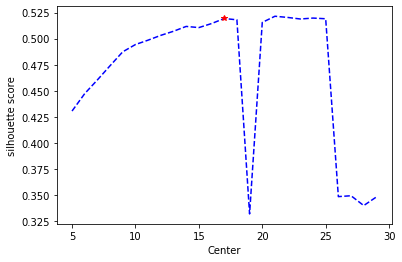

In [0]:
x = [i for i in range(5, 30)]
plt.plot(x, scores, 'b--');
plt.plot(x[12], scores[12], 'r*');
plt.xlabel('Center')
plt.ylabel('silhouette score')
plt.show()

In [0]:
best_cluster_size = 17 # best cluster size determined from the plot

Running one last kmeans with best cluster size

In [0]:
kmeans = KMeans(n_clusters=best_cluster_size, verbose=1, n_jobs=8, random_state=5)
pred = kmeans.fit_predict(train)

In [0]:
pred # labels for features determined as cluster membership

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

Incorporating The predicted classes into the Dataset:

In [0]:
# saving machine state to the original dataset
data["Machine_State"] = pred
train["Machine_State"] = pred

In [0]:
data #data after labeling them

,Unix_time,Sample_Size,Time_Period,Sampling_Rate,Sensor_Data_0,Sensor_Data_1,Sensor_Data_2,Sensor_Data_3,Sensor_Data_4,Sensor_Data_5,Sensor_Data_6,Sensor_Data_7,Sensor_Data_8,Sensor_Data_9,Sensor_Data_10,Sensor_Data_11,Sensor_Data_12,Sensor_Data_13,Sensor_Data_14,Sensor_Data_15,Sensor_Data_16,Sensor_Data_17,Sensor_Data_18,Sensor_Data_19,Sensor_Data_20,Sensor_Data_21,Sensor_Data_22,Sensor_Data_23,Sensor_Data_24,Sensor_Data_25,Sensor_Data_26,Sensor_Data_27,Sensor_Data_28,Sensor_Data_29,Sensor_Data_30,Sensor_Data_31,Sensor_Data_32,Sensor_Data_33,Sensor_Data_34,Sensor_Data_35,...,Sensor_Data_16500,Sensor_Data_16501,Sensor_Data_16502,Sensor_Data_16503,Sensor_Data_16504,Sensor_Data_16505,Sensor_Data_16506,Sensor_Data_16507,Sensor_Data_16508,Sensor_Data_16509,Sensor_Data_16510,Sensor_Data_16511,Sensor_Data_16512,Sensor_Data_16513,Sensor_Data_16514,Sensor_Data_16515,Sensor_Data_16516,Sensor_Data_16517,Sensor_Data_16518,Sensor_Data_16519,Sensor_Data_16520,Sensor_Data_16521,Sensor_Data_16522,Sensor_Data_16523,Sensor_Data_16524,Sensor_Data_16525,Sensor_Data_16526,Sensor_Data_16527,Sensor_Data_16528,Sensor_Data_16529,Sensor_Data_16530,Sensor_Data_16531,Sensor_Data_16532,Sensor_Data_16533,Sensor_Data_16534,Sensor_Data_16535,Sensor_Data_16536,Sensor_Data_16537,Sensor_Data_16538,Machine_State
0,1.556891e+09,16384,340,48188.235294,1618.629456,1619.082642,1620.089722,1620.039368,1620.039368,1620.240784,1620.391846,1620.089722,1619.435120,1620.492554,1620.744324,1621.046448,1620.542908,1621.096802,1620.744324,1619.938660,1620.039368,1619.737244,1619.535828,1618.931580,1619.636536,1619.837952,1620.744324,1620.492554,1620.442200,1620.593262,1620.442200,1619.989014,1620.391846,1620.643616,1620.039368,1619.535828,1620.442200,1620.593262,1620.693970,1619.485474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1.556891e+09,16384,341,48046.920821,1619.787598,1619.082642,1620.492554,1620.190430,1620.039368,1619.636536,1620.895386,1619.284058,1619.787598,1620.089722,1620.291138,1620.693970,1620.140076,1620.240784,1619.888306,1618.428040,1620.492554,1619.989014,1620.442200,1618.428040,1620.845032,1620.442200,1619.485474,1619.787598,1619.636536,1620.089722,1620.089722,1620.089722,1620.442200,1620.492554,1620.291138,1619.989014,1620.140076,1619.636536,1619.888306,1620.190430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1.556891e+09,16384,340,48188.235294,1619.636536,1620.643616,1620.291138,1620.693970,1620.140076,1620.190430,1620.895386,1620.442200,1619.837952,1620.643616,1620.240784,1621.046448,1621.247864,1620.794678,1620.945740,1620.190430,1620.693970,1620.391846,1620.542908,1620.291138,1619.989014,1619.334412,1619.787598,1619.284058,1620.089722,1619.787598,1619.384766,1619.233704,1620.240784,1620.089722,1619.586182,1620.391846,1619.938660,1620.039368,1621.298218,1620.291138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1.556891e+09,16384,340,48188.235294,1619.888306,1619.737244,1619.686890,1620.240784,1619.837952,1620.341492,1619.233704,1620.492554,1620.240784,1620.240784,1620.391846,1620.291138,1620.391846,1619.737244,1619.737244,1619.787598,1620.593262,1619.938660,1619.636536,1619.334412,1620.794678,1620.039368,1620.039368,1619.636536,1620.039368,1619.636536,1619.686890,1620.391846,1620.089722,1619.686890,1619.938660,1620.492554,1621.398926,1620.895386,1619.686890,1620.039368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1.556891e+09,16384,340,48188.235294,1619.636536,1620.291138,1620.391846,1619.586182,1620.039368,1620.442200,1619.686890,1621.197510,1620.089722,1620.341492,1620.089722,162

In [0]:
train #train data so that we can reuse for classification task without rescaling again

,Sensor_Data_0,Sensor_Data_1,Sensor_Data_2,Sensor_Data_3,Sensor_Data_4,Sensor_Data_5,Sensor_Data_6,Sensor_Data_7,Sensor_Data_8,Sensor_Data_9,Sensor_Data_10,Sensor_Data_11,Sensor_Data_12,Sensor_Data_13,Sensor_Data_14,Sensor_Data_15,Sensor_Data_16,Sensor_Data_17,Sensor_Data_18,Sensor_Data_19,Sensor_Data_20,Sensor_Data_21,Sensor_Data_22,Sensor_Data_23,Sensor_Data_24,Sensor_Data_25,Sensor_Data_26,Sensor_Data_27,Sensor_Data_28,Sensor_Data_29,Sensor_Data_30,Sensor_Data_31,Sensor_Data_32,Sensor_Data_33,Sensor_Data_34,Sensor_Data_35,Sensor_Data_36,Sensor_Data_37,Sensor_Data_38,Sensor_Data_39,...,Sensor_Data_16500,Sensor_Data_16501,Sensor_Data_16502,Sensor_Data_16503,Sensor_Data_16504,Sensor_Data_16505,Sensor_Data_16506,Sensor_Data_16507,Sensor_Data_16508,Sensor_Data_16509,Sensor_Data_16510,Sensor_Data_16511,Sensor_Data_16512,Sensor_Data_16513,Sensor_Data_16514,Sensor_Data_16515,Sensor_Data_16516,Sensor_Data_16517,Sensor_Data_16518,Sensor_Data_16519,Sensor_Data_16520,Sensor_Data_16521,Sensor_Data_16522,Sensor_Data_16523,Sensor_Data_16524,Sensor_Data_16525,Sensor_Data_16526,Sensor_Data_16527,Sensor_Data_16528,Sensor_Data_16529,Sensor_Data_16530,Sensor_Data_16531,Sensor_Data_16532,Sensor_Data_16533,Sensor_Data_16534,Sensor_Data_16535,Sensor_Data_16536,Sensor_Data_16537,Sensor_Data_16538,Machine_State
0,-0.084681,-0.078734,-0.016181,-0.023459,-0.022476,-0.006800,0.004748,-0.012808,-0.052425,0.017995,0.037236,0.058823,0.028190,0.063569,0.043682,-0.010319,-0.003117,-0.022344,-0.036694,-0.075504,-0.033664,-0.022599,0.033716,0.012481,0.007699,0.013303,0.000464,-0.030651,-0.008804,0.002579,-0.040436,-0.075923,-0.023627,-0.021920,0.009666,-0.067507,-0.012190,0.014674,-0.016635,-0.005208,...,0.005612,0.006354,0.007042,0.007705,0.008066,0.008337,0.008671,0.008758,0.008712,0.008527,0.008235,0.007841,0.007325,0.006780,0.006217,0.005395,0.004744,0.004034,0.003521,0.002856,0.002289,0.001780,0.001346,0.001007,0.000838,0.000818,0.000737,0.000852,0.001075,0.001486,0.001923,0.002347,0.002853,0.002907,0.003087,0.003292,0.003557,0.003703,0.003893,1
1,-0.013102,-0.078734,0.008825,-0.014023,-0.022476,-0.044851,0.036589,-0.064113,-0.029991,-0.007758,0.008327,0.036336,0.002530,0.009267,-0.010469,-0.105503,0.025347,-0.006601,0.019860,-0.106921,0.042057,0.015359,-0.045372,-0.031968,-0.043318,-0.018761,-0.022015,-0.024186,-0.005561,-0.007147,-0.024189,-0.046602,-0.043103,-0.083721,-0.042020,-0.022522,-0.082762,-0.065075,-0.029318,-0.065140,...,-0.024888,-0.024131,-0.023427,-0.022736,-0.022358,-0.022076,-0.021729,-0.021639,-0.021691,-0.021891,-0.022201,-0.022615,-0.023153,-0.023716,-0.024292,-0.025123,-0.025775,-0.026478,-0.026981,-0.027631,-0.028183,-0.028673,-0.029089,-0.029416,-0.029578,-0.029601,-0.029681,-0.029574,-0.029363,-0.028971,-0.028549,-0.028135,-0.027640,-0.027588,-0.027415,-0.027217,-0.026959,-0.026816,-0.026629,1
2,-0.022439,0.018121,-0.003678,0.017427,-0.016181,-0.009971,0.036589,0.009637,-0.026786,0.027652,0.005115,0.058823,0.073094,0.044403,0.056423,0.005545,0.037998,0.018586,0.026144,0.009320,-0.011579,-0.054231,-0.026391,-0.063717,-0.014621,-0.037999,-0.066972,-0.079131,-0.018534,-0.033083,-0.069680,-0.020539,-0.056087,-0.057699,0.048431,-0.016095,-0.063515,-0.087404,-0.089560,-0.030443,...,-0.043189,-0.042422,-0.041708,-0.041000,-0.040613,-0.040324,-0.039968,-0.039877,-0.039933,-0.040141,-0.040462,-0.040889,-0.041440,-0.042013,-0.042597,-0.043433,-0.044087,-0.044786,-0.045282,-0.045923,-0.046465,-0.046944,-0.047349,-0.047670,-0.047828,-0.047852,-0.047932,-0.047830,-0.047626,-0.047245,-0.046833,-0.046425,-0.045936,-0.045885,-0.045716,-0.045523,-0.045269,-0.045127,-0.044942,1
3,-0.006878,-0.038117,-0.041188,-0.010878,-0.035066,-0.000458,-0.068487,0.012844,-0.001147,0.001899,0.014751,0.010637,0.018568,-0.022676,-0.020025,-0.019837,0.031672,-0.009750,-0.030410,-0.050371,0.038902,-0.009946,-0.010573,-0.041492,-0.017810,-0.047618,-0.047705,-0.004794,-0.028264,-0.059020,-0.046934,-0.014023,0.038046,-0.002403,-0.054942,-0.032161,-0.018605,-0.026796,-

In [0]:
#saving data to disk
data.to_csv("DataFinal.csv")
train.to_csv("TrainDataFinal.csv")

# Deep Neural Network for Classification

In [0]:
y = train['Machine_State'] #splitting target labels from the dataset

In [0]:
x = train.drop('Machine_State', axis =1)

In [0]:
from sklearn.model_selection import train_test_split

Splitting the Dataset for train and test

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=5)

Building the Sequential Model:

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(16539))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(best_cluster_size, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               8468480   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 17)                2193      
Total params: 8,536,337
Trainable params: 8,536,337
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [0]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10)] #callbacks for stopping the model early so we dont overfit

In [0]:
y_train.shape # checking shape for the target labels

(720,)

In [0]:
x_test.shape #checking shape for data labels

(180, 16539)

Encoding sparse categorical features into a one-hot numeric array:



In [0]:
y_one_hot = tf.one_hot(y_train, depth=best_cluster_size)
y_one_hot.shape

TensorShape([720, 17])

Training for maximum of 200 epochs with validation/development split of 20% and batch size of 128

In [0]:
history = model.fit(x_train, y_one_hot, batch_size=128, validation_split=0.2, shuffle=True, epochs=200, callbacks=callbacks)

Train on 576 samples, validate on 144 samples
Epoch 1/200
576/576 [==============================] - 0s 754us/sample - loss: 4.4278 - acc: 0.4201 - val_loss: 3.2424 - val_acc: 0.8194
Epoch 2/200
576/576 [==============================] - 0s 158us/sample - loss: 1.9856 - acc: 0.8906 - val_loss: 5.2673 - val_acc: 0.8472
Epoch 3/200
576/576 [==============================] - 0s 142us/sample - loss: 2.3441 - acc: 0.9236 - val_loss: 3.9034 - val_acc: 0.8681
Epoch 4/200
576/576 [==============================] - 0s 135us/sample - loss: 1.3859 - acc: 0.9427 - val_loss: 2.3438 - val_acc: 0.9306
Epoch 5/200
576/576 [==============================] - 0s 134us/sample - loss: 1.0397 - acc: 0.9618 - val_loss: 4.9489 - val_acc: 0.9028
Epoch 6/200
576/576 [==============================] - 0s 136us/sample - loss: 0.8462 - acc: 0.9722 - val_loss: 3.5845 - val_acc: 0.9028
Epoch 7/200
576/576 [==============================] - 0s 139us/sample - loss: 0.5836 - acc: 0.9792 - val_loss: 2.7208 - val_acc: 0.

In [0]:
predictions = model.predict(x_test) #saving model predictions

In [0]:
y_test_onehot = tf.one_hot(y_test, depth=best_cluster_size) #converting test target labels to one hot as well

In [0]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot)

180/180 [==============================] - 0s 160us/sample - loss: 2.6419 - acc: 0.9278


In [0]:
predictions

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.6085007e-04, 9.8840350e-01, 8.8360306e-04, ..., 1.7413851e-04,
        1.3270486e-05, 8.6004729e-06]], dtype=float32)

In [0]:
preds = np.argmax(predictions, axis=1) #getting index of prediction with maximum probability

In [0]:
preds

array([13,  5,  2, 11,  1,  1,  4, 12,  1, 12,  1,  4,  1,  1,  7,  1,  1,
        1,  1,  1,  1,  2, 12,  1,  1,  1,  7,  7, 16, 16,  1,  1,  5, 11,
        2,  1,  5,  1,  1,  1,  1,  5,  7,  9,  6,  1,  1,  1, 16,  1,  1,
        1,  9,  4,  3, 11,  1,  1,  2,  8,  9,  1, 10,  9,  6,  8,  1,  1,
        1,  1,  1, 11,  0, 14,  1,  1, 10,  1,  1,  0,  5,  1,  1, 15,  7,
        1, 12,  1,  4,  5,  1,  1,  1,  4,  1,  1, 15,  1,  1,  1,  1, 16,
        6,  1,  3,  6,  1,  1,  1,  6,  0,  4,  1,  1,  1,  7,  6,  6,  1,
       15,  1, 11, 16,  1,  1, 11, 12,  1,  5,  8,  1,  4, 14, 10,  1,  1,
        1,  1,  1,  6,  3,  2, 11,  1,  1,  1,  1, 16,  1,  6,  1,  1,  2,
        1,  1,  4,  9,  1,  3,  1,  1,  1,  2,  6, 15,  9,  1,  1, 15,  1,
        1,  9,  7,  1,  1,  1,  0,  8,  2,  1])

In [0]:
y_test.to_numpy()

array([13,  5,  2, 11,  1,  1,  4, 12,  1, 12,  1,  4,  1,  1,  7,  1,  1,
        1,  1,  1,  1,  2, 12,  1,  1,  1,  7,  7, 16,  6,  1,  1,  5, 11,
        2,  1,  5,  1,  1,  1,  1,  5,  7, 12,  6,  1,  1,  1, 16,  1,  1,
        1,  9,  4,  3, 11,  1,  1,  2,  1,  9,  1, 10,  9,  6,  8,  1,  1,
        1,  1,  1, 11,  0, 14,  1,  1, 10,  1,  1,  0,  5,  1,  1, 15, 11,
        1,  7,  1,  4,  5,  1,  1,  1,  4,  1,  1, 15,  1,  1,  1,  1, 16,
        8,  1,  9,  6,  1,  1,  1, 15,  0, 15,  1,  1,  1,  7,  6,  6,  1,
       15,  1, 11, 16,  1,  1, 11, 13,  1,  5,  8,  1,  1, 14, 10,  1,  1,
        1,  1,  1,  6,  3,  2, 11,  1,  1,  1,  1, 16,  1,  8,  1,  1, 15,
        1,  1,  4,  9,  1,  3,  1,  1,  1,  2,  6, 15,  9,  1,  1, 15,  1,
        1,  9,  7,  1,  1,  1,  0,  8,  2,  1], dtype=int32)

In [0]:
y_test_numpy = y_test.to_numpy()

In [0]:
sklearn.metrics.accuracy_score(y_true=y_test_numpy, y_pred=preds)

0.9277777777777778

In [0]:
test_accuracy

0.92777777

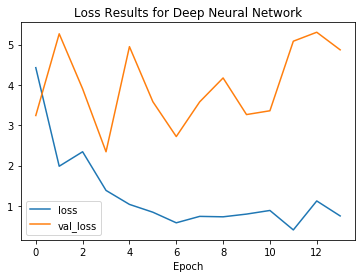

In [0]:
plt.plot(history.history['loss'], label = 'loss')

plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Loss Results for Deep Neural Network')
plt.xlabel('Epoch')
plt.legend()
plt.show()

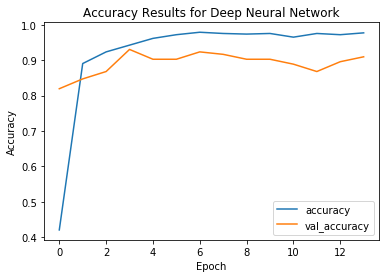

In [0]:
plt.plot(history.history['acc'], label = 'accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.title('Accuracy Results for Deep Neural Network')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluation

Accuracy

In [0]:
sklearn.metrics.accuracy_score(y_true=y_test_numpy, y_pred=preds)

0.9277777777777778

In [0]:
test_accuracy

0.92777777

Cluster Results

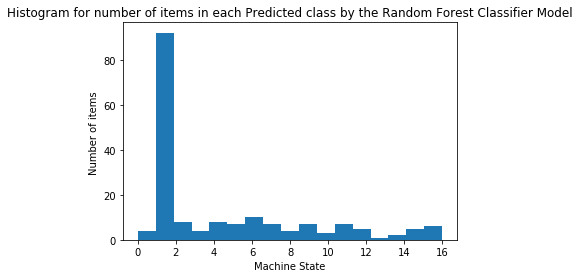

In [0]:
plt.hist(preds, bins=best_cluster_size)
plt.title('Histogram for number of items in each Predicted class by the Random Forest Classifier Model')
plt.xlabel('Machine State')
plt.ylabel('Number of items ');

Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn

In [0]:
CM = confusion_matrix(y_test_numpy, preds)
CM


array([[ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0, 92,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1],
       [ 0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  1,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  2,  0,  3,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  7,  0,  0,  

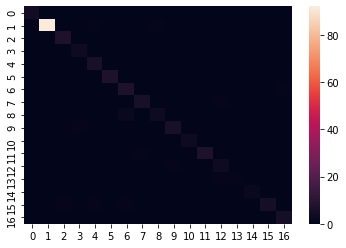

In [0]:
seaborn.heatmap(CM)
plt.show()

In [0]:
target_names = ['Machine_state {}'.format(i) for i in range(1, best_cluster_size+1)]
print(sklearn.metrics.classification_report(y_test_numpy, preds, target_names=target_names))

                  precision    recall  f1-score   support

 Machine_state 1       1.00      1.00      1.00         4
 Machine_state 2       1.00      0.98      0.99        94
 Machine_state 3       0.88      1.00      0.93         7
 Machine_state 4       0.75      1.00      0.86         3
 Machine_state 5       0.75      1.00      0.86         6
 Machine_state 6       1.00      1.00      1.00         7
 Machine_state 7       0.70      0.88      0.78         8
 Machine_state 8       0.86      0.86      0.86         7
 Machine_state 9       0.75      0.60      0.67         5
Machine_state 10       0.86      0.86      0.86         7
Machine_state 11       1.00      1.00      1.00         3
Machine_state 12       1.00      0.88      0.93         8
Machine_state 13       0.60      0.75      0.67         4
Machine_state 14       1.00      0.50      0.67         2
Machine_state 15       1.00      1.00      1.00         2
Machine_state 16       1.00      0.62      0.77         8
Machine_state

# Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 7)

In [0]:
rf.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [0]:
predictions = rf.predict(x_test)
predictions

array([13,  5,  2, 11,  1,  1,  4, 12,  1, 12,  1,  4,  1,  1,  7,  1,  1,
        1,  1,  1,  1,  2, 12,  1,  1,  1,  7,  7, 16, 16,  1,  1,  5, 11,
        2,  1,  5,  1,  1,  1,  1,  5,  7, 12,  6,  1,  1,  1, 16,  1,  1,
        1,  9,  4,  3, 11,  1,  1,  2,  1,  9,  1, 10,  9,  6,  8,  1,  1,
        1,  1,  1, 11,  0, 14,  1,  1, 10,  1,  1,  0,  5,  1,  1, 15,  3,
        1,  7,  1,  4,  5,  1,  1,  1,  4,  1,  1, 15,  1,  1,  1,  1, 16,
        6,  1,  9,  6,  1,  1,  1, 15,  0,  4,  1,  1,  1,  9,  6,  6,  1,
       15,  1, 11, 16,  1,  1, 11, 13,  1,  5,  8,  1,  4, 14, 10,  1,  1,
        1,  1,  1,  6,  3,  2, 11,  1,  1,  1,  1, 16,  1,  6,  1,  1, 15,
        1,  1,  4,  9,  1,  3,  1,  1,  1,  2,  6, 15,  9,  1,  1, 15,  1,
        1,  9,  7,  1,  1,  1,  0,  8,  2,  1], dtype=int32)

In [0]:
y_test_numpy

array([13,  5,  2, 11,  1,  1,  4, 12,  1, 12,  1,  4,  1,  1,  7,  1,  1,
        1,  1,  1,  1,  2, 12,  1,  1,  1,  7,  7, 16,  6,  1,  1,  5, 11,
        2,  1,  5,  1,  1,  1,  1,  5,  7, 12,  6,  1,  1,  1, 16,  1,  1,
        1,  9,  4,  3, 11,  1,  1,  2,  1,  9,  1, 10,  9,  6,  8,  1,  1,
        1,  1,  1, 11,  0, 14,  1,  1, 10,  1,  1,  0,  5,  1,  1, 15, 11,
        1,  7,  1,  4,  5,  1,  1,  1,  4,  1,  1, 15,  1,  1,  1,  1, 16,
        8,  1,  9,  6,  1,  1,  1, 15,  0, 15,  1,  1,  1,  7,  6,  6,  1,
       15,  1, 11, 16,  1,  1, 11, 13,  1,  5,  8,  1,  1, 14, 10,  1,  1,
        1,  1,  1,  6,  3,  2, 11,  1,  1,  1,  1, 16,  1,  8,  1,  1, 15,
        1,  1,  4,  9,  1,  3,  1,  1,  1,  2,  6, 15,  9,  1,  1, 15,  1,
        1,  9,  7,  1,  1,  1,  0,  8,  2,  1], dtype=int32)

Text(0, 0.5, 'Number of Items')

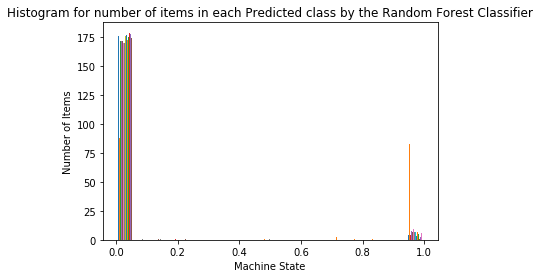

In [0]:
plt.hist(predictions, bins=best_cluster_size)
plt.title('Histogram for number of items in each Predicted class by the Random Forest Classifier')
plt.xlabel('Machine State')
plt.ylabel('Number of Items')

In [0]:
from sklearn.model_selection import validation_curve

In [0]:
param_range = np.arange(1, 100, 2)
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             x_train, 
                                             y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



## Evaluation

In [0]:
errors = abs(predictions - y_test_numpy)
print('Mean Absolute Error:', round(np.mean(errors),2), 'degrees.')

ValueError: ignored

In [0]:
accuracy= sklearn.metrics.accuracy_score(y_true=y_test_numpy, y_pred=predictions)
print('Accuracy:', accuracy, '%.')

Accuracy: 0.9611111111111111 %.


In [0]:
print(sklearn.metrics.classification_report(y_test_numpy, predictions, target_names=target_names))

ValueError: ignored

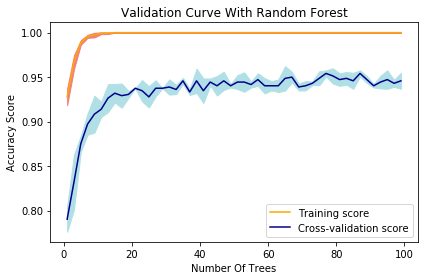

In [0]:
# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="orange")
plt.plot(param_range, test_mean, label="Cross-validation score", color="darkblue")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color='lightcoral')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color='powderblue')

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [0]:
CM1 = confusion_matrix(y_true=y_test_numpy, y_pred=predictions)
CM1


ValueError: ignored